# Implementation Vaildation

## `PositionArray` class

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
sys.path.insert(1, os.getcwd()) 
sys.path.append("..")
from src.uilc import *


In [26]:
# axis location array
Nx = 6
Ny = 4
xarr=  np.linspace(-4, 4, Nx)
yarr = np.linspace( -2, 2, Ny)
mesh_x, mesh_y = np.meshgrid(xarr, yarr, indexing="ij") 
mesh_xt, mesh_yt = np.meshgrid(xarr, yarr, indexing="xy") 


In [27]:
source_array = PositionArray.from_arrays(xarr, yarr) # from 2 array of 1 dimension, generate plane array.
Utils.print_mesh_point(source_array) # (x, y) sources datas are recoreded.

(-4.0, 2.0)(-2.4, 2.0)(-0.8, 2.0)(0.8, 2.0)(2.4, 2.0)(4.0, 2.0):

(-4.0, 0.67)(-2.4, 0.67)(-0.8, 0.67)(0.8, 0.67)(2.4, 0.67)(4.0, 0.67):

(-4.0, -0.67)(-2.4, -0.67)(-0.8, -0.67)(0.8, -0.67)(2.4, -0.67)(4.0, -0.67):

(-4.0, -2.0)(-2.4, -2.0)(-0.8, -2.0)(0.8, -2.0)(2.4, -2.0)(4.0, -2.0):



In [28]:
p = PositionArray.from_meshgrid(mesh_x, mesh_y, indexing="ij") # Generate array from mesh grid data
Utils.print_mesh_point(p)
print("===================================")
pxy = PositionArray.from_meshgrid(mesh_xt, mesh_yt, indexing="xy") # Generate array from mesh grid data
Utils.print_mesh_point(pxy)

(-4.0, 2.0)(-2.4, 2.0)(-0.8, 2.0)(0.8, 2.0)(2.4, 2.0)(4.0, 2.0):

(-4.0, 0.67)(-2.4, 0.67)(-0.8, 0.67)(0.8, 0.67)(2.4, 0.67)(4.0, 0.67):

(-4.0, -0.67)(-2.4, -0.67)(-0.8, -0.67)(0.8, -0.67)(2.4, -0.67)(4.0, -0.67):

(-4.0, -2.0)(-2.4, -2.0)(-0.8, -2.0)(0.8, -2.0)(2.4, -2.0)(4.0, -2.0):

(-4.0, 2.0)(-2.4, 2.0)(-0.8, 2.0)(0.8, 2.0)(2.4, 2.0)(4.0, 2.0):

(-4.0, 0.67)(-2.4, 0.67)(-0.8, 0.67)(0.8, 0.67)(2.4, 0.67)(4.0, 0.67):

(-4.0, -0.67)(-2.4, -0.67)(-0.8, -0.67)(0.8, -0.67)(2.4, -0.67)(4.0, -0.67):

(-4.0, -2.0)(-2.4, -2.0)(-0.8, -2.0)(0.8, -2.0)(2.4, -2.0)(4.0, -2.0):



In [29]:
puniform = PositionArray.uniform((2, 1), (Nx, Ny)) # uniformly distributed array
xarr_m = puniform.get_axis_list("x")
yarr_m = puniform.get_axis_list("y")
xarr_mesh, yarr_mesh = np.meshgrid(xarr_m, yarr_m, indexing="xy")
m = PositionArray.from_meshgrid(xarr_mesh, yarr_mesh, indexing="xy")
Utils.print_mesh_point(m)

(-5.0, -1.5)(-3.0, -1.5)(-1.0, -1.5)(1.0, -1.5)(3.0, -1.5)(5.0, -1.5):

(-5.0, -0.5)(-3.0, -0.5)(-1.0, -0.5)(1.0, -0.5)(3.0, -0.5)(5.0, -0.5):

(-5.0, 0.5)(-3.0, 0.5)(-1.0, 0.5)(1.0, 0.5)(3.0, 0.5)(5.0, 0.5):

(-5.0, 1.5)(-3.0, 1.5)(-1.0, 1.5)(1.0, 1.5)(3.0, 1.5)(5.0, 1.5):



In [30]:
Utils.print_mesh_point(0.2*puniform) # operation check

(-1.0, 0.3)(-0.6, 0.3)(-0.2, 0.3)(0.2, 0.3)(0.6, 0.3)(1.0, 0.3):

(-1.0, 0.1)(-0.6, 0.1)(-0.2, 0.1)(0.2, 0.1)(0.6, 0.1)(1.0, 0.1):

(-1.0, -0.1)(-0.6, -0.1)(-0.2, -0.1)(0.2, -0.1)(0.6, -0.1)(1.0, -0.1):

(-1.0, -0.3)(-0.6, -0.3)(-0.2, -0.3)(0.2, -0.3)(0.6, -0.3)(1.0, -0.3):



In [31]:
puniform[0][5] # index access

PositionArray([5. , 1.5])

## Optimization process

### ESC

Linear 

In [32]:
# Optical and geometrical system parameter
s = 3
h = 0.3

In [33]:
lamber_pattern = lambda d: Radiation.lambertian(s, h, d)

In [34]:
#Linear pattern
coef_x, coef_y = ESC.coefficient(s, Nx, Ny, shape="L")
esc_xarry = h*coef_x * PositionArray.csym_index(Nx)
esc_yarry = h*coef_y * PositionArray.csym_index(Ny)
esc_array_linear_1 = PositionArray.from_arrays(esc_xarry, esc_yarry)

In [35]:
# simply
esc_array_linear_2 = h*ESC.array(s, Nx, Ny, shape="L")

In [36]:
Wx, Wy = esc_array_linear_1.area

In [37]:
X, Y = Utils.plane_meshgrid((-Wx, Wx), (-Wy, Wy), (300, 400))

In [38]:
# Intensity calcualtion
esc_Z_linear_1 = esc_array_linear_1.intensity_on((X,Y), lamber_pattern)
esc_Z_linear_2 = esc_array_linear_2.intensity_on((X,Y), lamber_pattern)

In [39]:
esc_source_linear_1 = esc_array_linear_1.intensity_on((X,Y), lambda d: Radiation.gaussian(1, 0.06, d)/Radiation.gaussian(1, 0.001, 0))
esc_source_linear_2 = esc_array_linear_2.intensity_on((X,Y), lambda d: Radiation.gaussian(1, 0.06, d)/Radiation.gaussian(1, 0.001, 0))

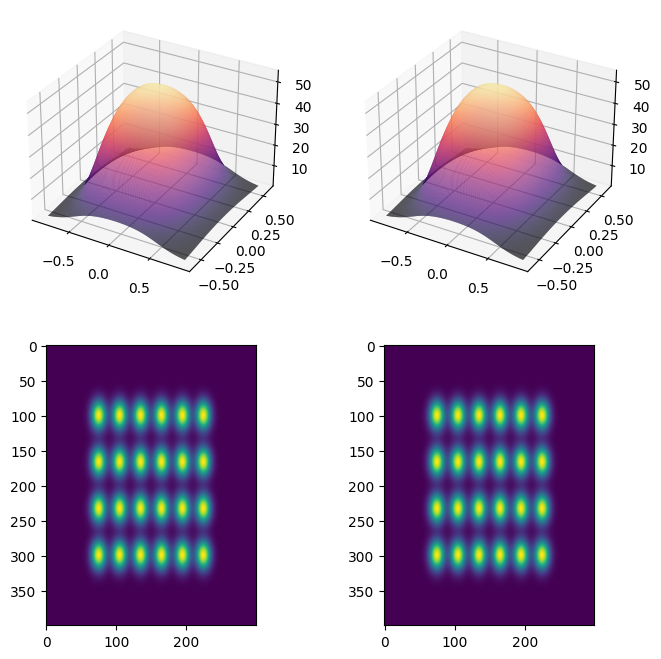

In [40]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2, 2, 1, projection="3d")
ax2 = fig.add_subplot(2, 2, 2, projection="3d")
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax1.plot_surface(X, Y, esc_Z_linear_1, rstride= 1, cstride =1, cmap='magma', edgecolor='none')
ax2.plot_surface(X, Y, esc_Z_linear_2, rstride= 1, cstride =1, cmap='magma', edgecolor='none')
ax3.imshow(esc_source_linear_1) 
ax4.imshow(esc_source_linear_2)
plt.show()

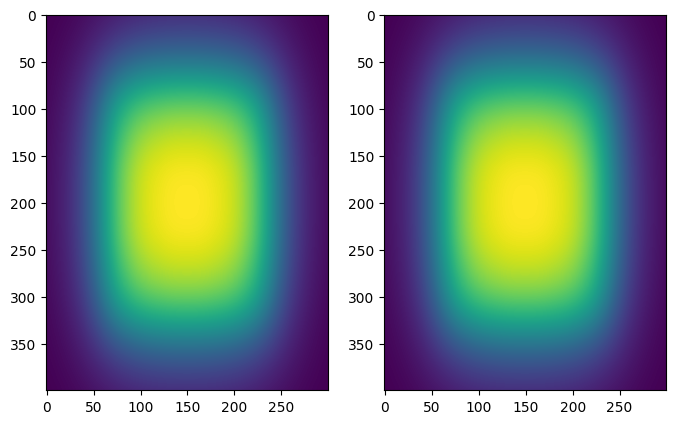

In [41]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.imshow(esc_Z_linear_1)
ax2.imshow(esc_Z_linear_2)
plt.show()

Recatangular

In [42]:
esc_array_rectangular = h* ESC.array(s, Nx, Ny, shape="R")

In [43]:
Wx, Wy = esc_array_linear_1.area
X, Y = Utils.plane_meshgrid((-Wx, Wx), (-Wy, Wy), (300, 400))
# Intensity calcualtion
esc_Z_rectangular = esc_array_rectangular.intensity_on((X,Y), lamber_pattern)
esc_source_rectangular = esc_array_rectangular.intensity_on((X,Y), lambda d: Radiation.gaussian(1, 0.06, d)/Radiation.gaussian(1, 0.06, 0))

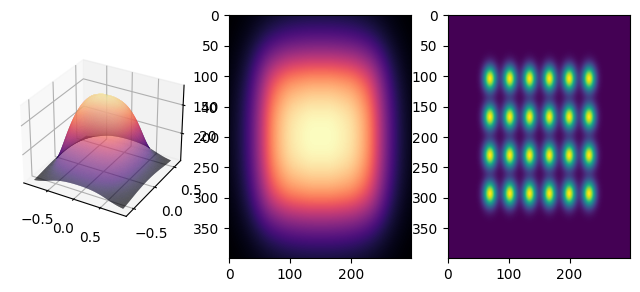

In [44]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ax1.plot_surface(X, Y, esc_Z_rectangular, rstride= 1, cstride =1, cmap='magma', edgecolor='none')
ax2.imshow(esc_Z_rectangular, cmap='magma') 
ax3.imshow(esc_source_rectangular)
plt.show()

In [45]:
wa, wb = esc_Z_rectangular.shape
wa, wb =  esc_Z_rectangular.shape
wa, wb = wb, wa
dx = wa/(2*Wx)
dy = wb/(2*Wy)
area_points = [
    [dx*np.array([Wx/2, 1.5*Wx] ), dy*np.array([Wy/2, Wy/2])],
    [dx*np.array([Wx/2, 1.5*Wx]  ), dy*np.array([1.5*Wy, 1.5*Wy])],
    [dx*np.array([Wx/2, Wx/2] ), dy*np.array([Wy/2, 1.5*Wy])],
    [dx*np.array([1.5*Wx, 1.5*Wx]), dy*np.array([Wy/2, 1.5*Wy])]
]


In [46]:
print(area_points)

[[PositionArray([ 75., 225.]), PositionArray([100., 100.])], [PositionArray([ 75., 225.]), PositionArray([300., 300.])], [PositionArray([75., 75.]), PositionArray([100., 300.])], [PositionArray([225., 225.]), PositionArray([100., 300.])]]


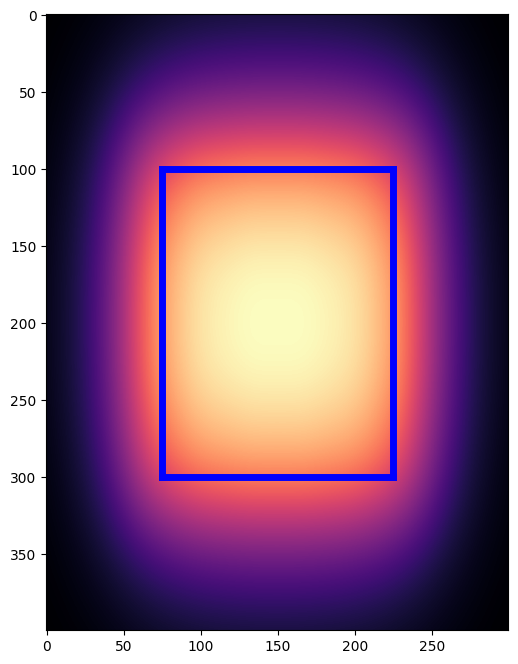

In [47]:
fig = plt.figure(figsize=(8,8))
ax_test = fig.add_subplot()
for ps in area_points:
    ax_test.plot(ps[0], ps[1], 'b-', linewidth=5)
ax_test.imshow(esc_Z_rectangular, cmap='magma')
#ax_test.set_xlim(0, Wx)
#ax_test.set_ylim(0, Wy)
plt.show()

In [48]:
es = esc_Z_rectangular/esc_Z_rectangular.max()

In [49]:
b = np.where(es < 0.75, 0, es)

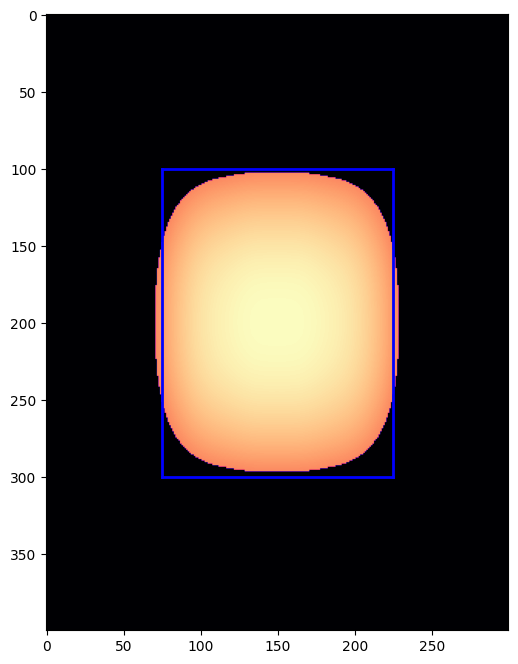

In [52]:
fig = plt.figure(figsize=(8,8))
ax_test = fig.add_subplot()
for ps in area_points:
    ax_test.plot(ps[0], ps[1], 'b-', linewidth=2)
ax_test.imshow(b, cmap='magma')
#ax_test.set_xlim(0, Wx)
#ax_test.set_ylim(0, Wy)
plt.show()

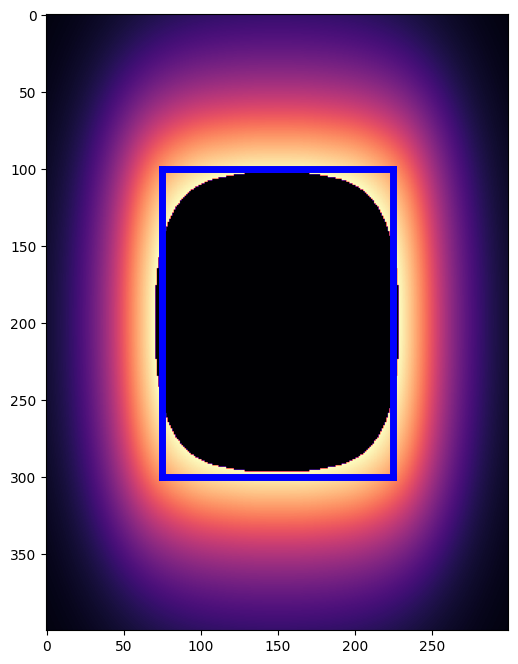

In [53]:
fig = plt.figure(figsize=(8,8))
ax_test = fig.add_subplot()
for ps in area_points:
    ax_test.plot(ps[0], ps[1], 'b-', linewidth=5)
ax_test.imshow(es-b, cmap='magma')
#ax_test.set_xlim(0, Wx)
#ax_test.set_ylim(0, Wy)
plt.show()

Fill a given area

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
sys.path.insert(1, os.getcwd()) 
sys.path.append("..")
from src.uilc import *

In [55]:
s = 4
h = 0.3
Wx, Wy = 0.6, 0.5

In [56]:
N = ESC.get_nmax(s, [Wx, Wy], h, shpae="L")
Nx, Ny = N[1:3]
esc_array_rect = h* ESC.array(s, Nx, Ny, shape="L")

In [82]:
W = esc_array_rect.area
nx = 400
ny = Utils.half_ceil((W[1]/W[0])*nx)
X, Y = Utils.plane_meshgrid((-W[0], W[0]), (-W[1], W[1]), (nx, ny))
intensity_z = esc_array_rect.intensity_on((X,Y), lambda d: Radiation.lambertian(s, h, d))

In [83]:
wa, wb = intensity_z.shape
wa, wb = wb, wa
dx = wa/(2*Wx)
dy = wb/(2*Wy)
area_points = [
    [dx*np.array([Wx/2, 1.5*Wx] ), dy*np.array([Wy/2, Wy/2])],
    [dx*np.array([Wx/2, 1.5*Wx]  ), dy*np.array([1.5*Wy, 1.5*Wy])],
    [dx*np.array([Wx/2, Wx/2] ), dy*np.array([Wy/2, 1.5*Wy])],
    [dx*np.array([1.5*Wx, 1.5*Wx]), dy*np.array([Wy/2, 1.5*Wy])]
]

In [88]:
a_norm = intensity_z/intensity_z.max()
a = np.where(a_norm > 0.8, 1, a_norm)
a = np.where((a<= 0.8) & (a> 0.6), 0.66, a)
a = np.where((a<= 0.6) & (a> 0.4), 0.35, a)
a = np.where(a<=0.2, 0, a)

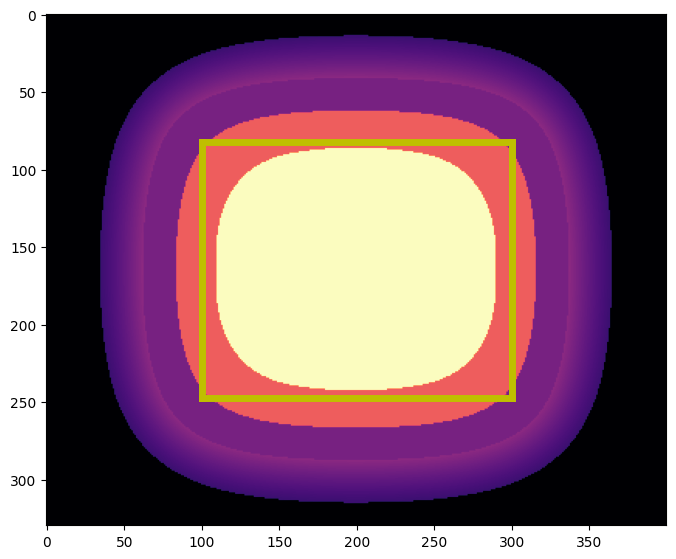

In [89]:
fig = plt.figure(figsize=(8,8))
ax_test = fig.add_subplot()
for ps in area_points:
    ax_test.plot(ps[0], ps[1], 'y-', linewidth=5)
ax_test.imshow(a, cmap='magma')
#ax_test.set_xlim(0, Wx)
#ax_test.set_ylim(0, Wy)
plt.show()

## Non-Heuristhic

### Boundary-Matching

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
sys.path.insert(1, os.getcwd()) 
sys.path.append("..")
from src.uilc import *

def region(dx, dy, Wx, Wy, wx=1, wy=1, status = 0):
    if status == 0:
        return [
            [[wx*(Wx-dx)/2, wx*(Wx+dx)/2],[wy*(Wy-dy)/2, wy*(Wy-dy)/2]],
            [[wx*(Wx-dx)/2, wx*(Wx+dx)/2],[wy*(Wy+dy)/2, wy*(Wy+dy)/2]],
            [[wx*(Wx-dx)/2, wx*(Wx-dx)/2],[wy*(Wy-dy)/2, wy*(Wy+dy)/2]],
            [[wx*(Wx+dx)/2, wx*(Wx+dx)/2],[wy*(Wy-dy)/2, wy*(Wy+dy)/2]]
        ]
    else:
        return [
            [[wx*(-dx), wx*(+dx)],[wy*(-dy), wy*(-dy)]],
            [[wx*(-dx), wx*(+dx)],[wy*(+dy), wy*(+dy)]],
            [[wx*(-dx), wx*(-dx)],[wy*(-dy), wy*(+dy)]],
            [[wx*(+dx), wx*(+dx)],[wy*(-dy), wy*(+dy)]]
        ]

In [86]:
s = 4
H = 0.3
Wx, Wy = 0.6, 0.8

In [87]:
xe = OP.xe(s, Wx, H)
ye = OP.xe(s, Wy, H)
xm = OP.xm(s, Wx, H, xe)
ym = OP.xm(s, Wy, H, ye)

In [88]:
nx = OP.fill_rq(s, H, xm, xe, status = 1)
ny = OP.fill_rq(s, H, ym, ye, status = 1)

In [89]:
bc_pq_array = H*ESC.array(s, nx, ny)

In [90]:
plot_dim = (400, 400)
plot_xy= Utils.plane_meshgrid((-0.6*Wx, 0.6*Wx), (-0.6*Wy, 0.6*Wy), plot_dim)
sources_dis = bc_pq_array.intensity_on(plot_xy,  lambda d: Radiation.gaussian(1, 0.06, d)/Radiation.gaussian(1, 0.06, 0))
int_bc = bc_pq_array.intensity_on(plot_xy,  lambda d: Radiation.lambertian(s, H, d))
dim_x, dim_y = plot_dim
dx = dim_x/(2*Wx)
dy = dim_y/(2*Wy)

In [91]:
dx, dy =1 ,1
given_region = region(Wx/2, Wy/2, 2*Wx, 2*Wy, dx, dy, status = 1)
min_region =  region(xm, ym, 2*Wx,2*Wy, dx, dy, status = 1)
xe_region = region(xe, ye, 2*Wx,2*Wy, dx, dy, status = 1)

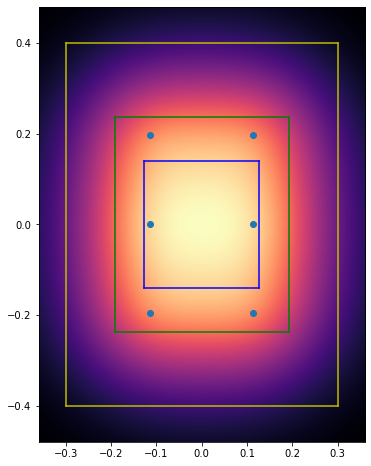

In [93]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
for p in given_region:
    ax.plot(*p, "y-")
for p in min_region:
    ax.plot(*p, "b-")
for p in xe_region:
    ax.plot(*p, "g-")
ax.plot()
ax.imshow(
    int_bc, 
    extent=[-0.6*Wx, 0.6*Wx,-0.6*Wy, 0.6*Wy],
    cmap = "magma"
    )
#ax.scatter(
#    [xm, xm, -xm, -xm, xe, xe, -xe, -xe], 
#    [ym, -ym, ym, -ym, ye, -ye, ye, -ye])
#    
ax.scatter(
    *bc_pq_array.to_meshgrid()
)
ax.set_autoscale_on(False)
plt.show()

In [8]:
bc_arr = PositionArray.from_arrays(bc_arr_x, bc_arr_y)  

In [ ]:
W = esc_array_rect.area
nx = 400
ny = Utils.half_ceil((W[1]/W[0])*nx)
X, Y = Utils.plane_meshgrid((-W[0], W[0]), (-W[1], W[1]), (nx, ny))
intensity_z = bc_arr.intensity_on((X,Y), lambda d: Radiation.lambertian(s, h, d))

In [ ]:
fig = plt.figure(figsize=(8,8))
ax_test = fig.add_subplot()
for ps in area_points:
    ax_test.plot(ps[0], ps[1], 'y-', linewidth=5)
ax_test.imshow(intensity_z, cmap='magma')
plt.show()

In [ ]:
wa, wb = intensity_z.shape
wa, wb = wb, wa
dx = wa/(2*Wx)
dy = wb/(2*Wy)
area_points = [
    [dx*np.array([Wx/2, 1.5*Wx] ), dy*np.array([Wy/2, Wy/2])],
    [dx*np.array([Wx/2, 1.5*Wx]  ), dy*np.array([1.5*Wy, 1.5*Wy])],
    [dx*np.array([Wx/2, Wx/2] ), dy*np.array([Wy/2, 1.5*Wy])],
    [dx*np.array([1.5*Wx, 1.5*Wx]), dy*np.array([Wy/2, 1.5*Wy])]
]

In [ ]:
a_norm = intensity_z/intensity_z.max()
a = np.where(a_norm > 0.8, 1, a_norm)
a = np.where((a<= 0.8) & (a> 0.6), 0.66, a)
a = np.where((a<= 0.6) & (a> 0.4), 0.35, a)
a = np.where(a<=0.2, 0, a)

In [ ]:
fig = plt.figure(figsize=(8,8))
ax_test = fig.add_subplot()
for ps in area_points:
    ax_test.plot(ps[0], ps[1], 'y-', linewidth=5)
ax_test.imshow(a, cmap='magma')
plt.show()

### Power Weight

KDE binarization

Frequncy binarization